# Template for Problem 1 (HW 3)

In [3]:
import numpy as np
import scipy.io

In [4]:
data = scipy.io.loadmat('mnist.mat')

In [5]:
ytrain  = data['ytrain']
xtrain  = data['xtrain']
ytest   = data['ytest']
xtest   = data['xtest']
yval    = data['yval']
xval    = data['xval']

In [6]:
# Runs the SSGD on SVM objective taking in an initial weight vector
# theta0, matrix of covariates Xtrain, a vector of labels ytrain.
# 'tot_iter' is the number of passes to be made through the data.
# lbda is the regularization parameter.
# Outputs the learned weight vector theta.
def train(theta0, Xtrain, ytrain, tot_iters, lamda):
    N, D = Xtrain.shape
    theta = theta0
    np.random.seed(20)
    for t in range(tot_iters):
        it = np.random.randint(0, N)
        eta_t = 1/(lamda*(t+1))
        if ytrain[it]*np.dot(Xtrain[it], theta) < 1:
            theta = (1 - lamda*eta_t)*theta + eta_t*ytrain[it]*Xtrain[it]
        else:
            theta = (1 - lamda*eta_t)*theta
    return theta


In [7]:
# Define predictions 
def pred(theta, X):
	return np.sign(np.dot(X, theta))

In [8]:
# Computes the accuracy on a test dataset
def accuracy(X, y, theta):
    y_pred = pred(theta, X)
    y_pred = y_pred.reshape((-1,1))
    acc = np.mean(y_pred == y)
    return acc

In [9]:
# Get training and testing data
# training
N, p      = np.shape(data['xtrain'])
theta0    = np.zeros(p) # or random initialization
tot_iter  = 40*N
lamda     = 10.0
theta     = train(theta0, data['xtrain'], data['ytrain'], tot_iter, lamda)

# evaluation
print('Train Accuracy: {0}%, Test Accuracy: {1}%'.format(accuracy(data['xtrain'], data['ytrain'], theta) * 100, accuracy(data['xtest'], data['ytest'], theta) * 100))


Train Accuracy: 79.43%, Test Accuracy: 79.5%


Text(0.5, 1.0, 'Validation error vs lambda')

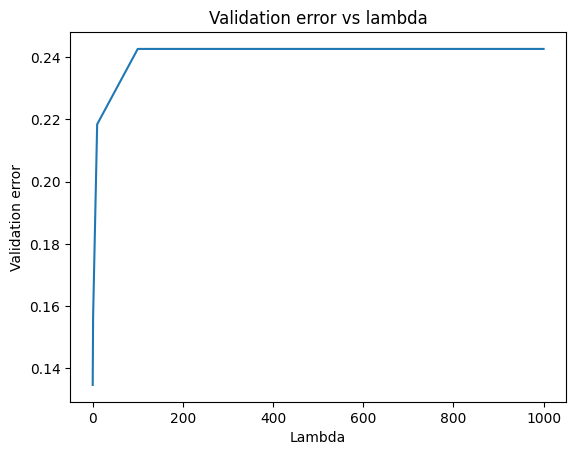

In [10]:
# Find best lamda using validation
import matplotlib.pyplot as plt
lamda_set = [0.1,1,10,100,1000]
error_set = []
for lamda in lamda_set:
    theta = train(theta0,xtrain,ytrain,tot_iter,lamda)
    error_set.append(1-accuracy(xval,yval,theta))
    
plt.plot(lamda_set,error_set)
plt.xlabel('Lambda')
plt.ylabel('Validation error')
plt.title('Validation error vs lambda')

In [11]:
iteration_set = np.linspace(10,200,20)
train_accuracy_set = []
test_accuracy_set = []
lamda = 0.1
N, p = np.shape(data['xtrain'])
for iteration in iteration_set:
    theta0    = np.zeros(p)
    theta = train(theta0,xtrain,ytrain,int(x)*N,lamda)
    train_accuracy_set.append(accuracy(xtrain,ytrain,theta))
    test_accuracy_set.append(accuracy(xtest,ytest,theta))

plt.plot(iteration_set,train_accuracy_set,label='Training accuracy')
plt.plot(iteration_set,test_accuracy_set,label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

KeyboardInterrupt: 